# <center> Solución de sistemas de ecuaciones lineales

$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

Cuando hacemos análisis numérico, no solamente nos interesa encontrar una solución a un problema, sino también queremos saber y entender qué tan confiable es esa solución.
En el tema anterior, vimos que las computadoras trabajan con aritmética de punto flotante (APF), y esto significa que casi siempre hay pequeños errores de redondeo o truncamiento en nuestros cálculos.

Vimos, por ejemplo, que $fl(x) - fl(y)$ no es lo mismo que $x - y$, y que al compararlos tenemos un error dado por un número real.

Ahora, al resolver sistemas de ecuaciones lineales

$$Ax=b$$

la solución $x$ y el vector $b$ no son números únicos, son vectores; y el error en la solución, $e = x_{real} - x_{aproximado}$, también es un vector.

Pero entonces...

Si el error es un vector, **¿cómo lo medimos?** ¿Cómo podemos decir si un error vectorial es _grande_ o _pequeño_?

#### Veamos un pequeño caso

Imaginemos que estamos resolviendo un sistema de 1000 ecuaciones y obtenemos dos vectores de error distintos para dos métodos diferentes:

$$e_1 = \mymatrix{r}{ 0.1 \\ 0.1 \\ ... \\ 0.1 }$$

$$e_2 = \mymatrix{r}{ 100 \\ 0 \\ ... \\ 0 }$$

**¿Cuál es peor?**

La respuesta es:

...

Que no hay respuesta. :(

Dependiendo del problema o el sistema, ambos podrían ser uno peor que otro.

Necesitamos una herramienta matemática formal para medir el _tamaño_ de un vector. Esa herramienta es la **norma**.

## Norma vectorial

Una norma es una función que toma un vector y devuelve un número real no negativo, que representa su 'longitud'. Para que una función sea una norma, debe cumplir cuatro propiedades clave:

* $||x|| \geq 0$ (nunca es negativa)
* $||x|| = 0$ si y solo si $x=0$
* $||\alpha x|| = |\alpha| ||x||$ (saca escalares con valor absoluto)
* $||x+y|| \leq ||x||+||y||$ (desigualdad del triángulo)

Muchas funciones pueden cumplir estas propiedades, pero en la práctica, usamos un conjunto de normas muy útiles llamadas **p-normas**.

### Las tres p-normas principales

In [1]:
import numpy as np

# vectores de error
e1 = np.array([0.1, 0.1, 0.1, 0.1, 0.1])
e2 = np.array([0.5, 0, 0, 0, 0])

print(f"Vector e1: {e1}")
print(f"Vector e2: {e2}")

Vector e1: [0.1 0.1 0.1 0.1 0.1]
Vector e2: [0.5 0.  0.  0.  0. ]


#### L1 (norma Manhattan)

$||x||_1 = \sum |x_i| = |x_1|+ |x_2| + ... + |x_n|$

In [2]:
# norma L1
normL1_e1 = np.linalg.norm(e1, ord=1)
normL1_e2 = np.linalg.norm(e2, ord=1)

print(f"Norma L1 de e1: {normL1_e1}")
print(f"Norma L1 de e2: {normL1_e2}") 

Norma L1 de e1: 0.5
Norma L1 de e2: 0.5


#### L2 (norma Euclidiana)

$||x||_2 = \sqrt{\sum x_i^2} = \sqrt{x_1^2 + x_2^2 + ... + x_n^2}$

In [3]:
# norma L2
normL2_e1 = np.linalg.norm(e1, ord=2)
normL2_e2 = np.linalg.norm(e2, ord=2)

print(f"Norma L2 de e1: {normL2_e1:.4f}")
print(f"Norma L2 de e2: {normL2_e2:.4f}")

Norma L2 de e1: 0.2236
Norma L2 de e2: 0.5000


#### L-inf (norma infinito o norma del máximo)

$||x||_\infty = \max|x_i|$

In [4]:
# L-inf
normLinf_e1 = np.linalg.norm(e1, ord=np.inf)
normLinf_e2 = np.linalg.norm(e2, ord=np.inf)

print(f"Norma L-inf de e1: {normLinf_e1}")
print(f"Norma L-inf de e2: {normLinf_e2}")

Norma L-inf de e1: 0.1
Norma L-inf de e2: 0.5


Una manera de percibir el efecto de una norma es ver la manera en que determinan el _disco_ unitario

$$ \left\{ ||x|| \in \mathbb{R}^n : ||x|| = 1 \right\} $$

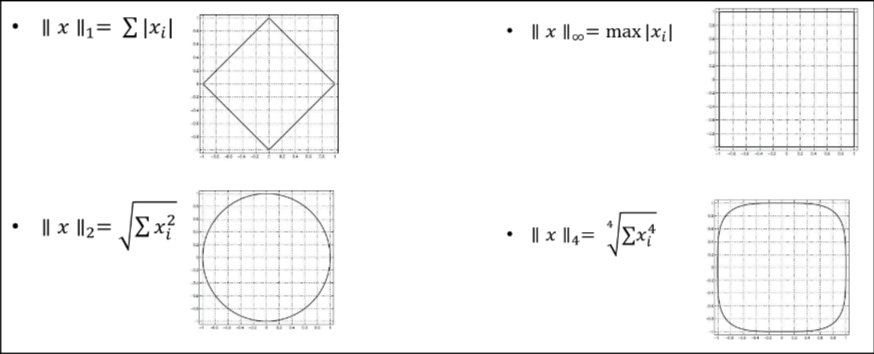

<div>
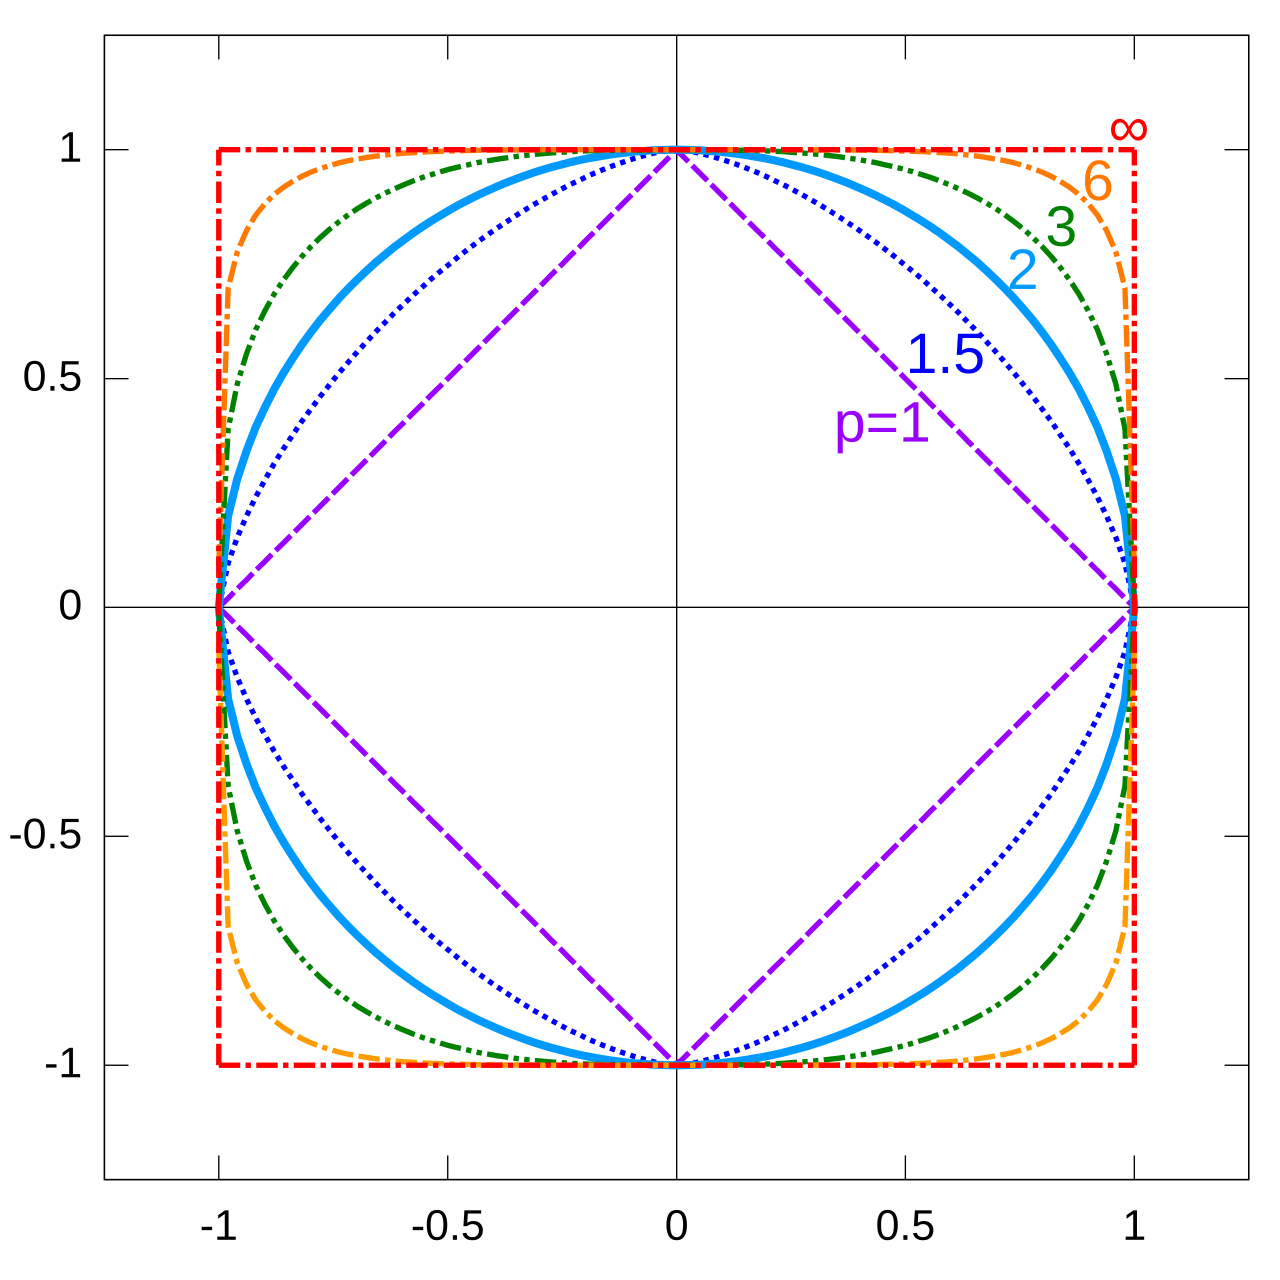
</div>

La elección de la norma depende de qué aspecto del error nos interesa más:

* el error acumulado (L1)
* la magnitud total (L2)
* o el peor caso (L-inf).

### Ok... ¿y eso qué tiene que ver?

Volviendo al tema del sistema $Ax = b$, queremos ver cómo el sistema puede actuar como un amplificador de error.

Un sistema de ecuaciones es sensible (o está **mal condicionado**) si un cambio muy pequeño en el vector $b$ provoca un cambio muy grande en la solución $x$.

#### Ejemplo: sensibilidad en los sistemas

Consideraremos un sistema bien condicionado, asociado a una matriz estable $E$, y un sistema mal condicionado, asociado a una matriz sensible $S$.

$$ E = \mymatrix{r}{ 1 & 2 \\ 3 & 4 }$$

$$ S = \mymatrix{r}{ 1 & 1 \\ 1 & 1.0001 }$$

Queremos medir cómo un cambio relativo en la entrada, $\frac{||\delta b||}{||b||}$, se puede traducir en un error relativo en la salida, $\frac{||\delta x||}{||x||}$.

Podemos usar cualquiera de las tres normas que vimos, pues el sistema mal condicionado mostraría una amplificación del error sin importar si usamos la norma L1, L2 o L-inf; pero para este ejemplo usaremos L2 porque es la más conectada con nuestra intuición y con la geometría euclidiana en que opera el sistema.

In [5]:
b = np.array([1, 1])
E = np.array([[1, 2], [3, 4]]) # matriz estable
S = np.array([[1, 1], [1, 1.0001]]) # matriz sensible, tiene columnas casi paralelas

# soluciones originales
x_E = np.linalg.solve(E, b)
x_S = np.linalg.solve(S, b)

print(f"E = \n{E}")
print(f"Solución con matriz estable: {x_E}")
print()
print(f"S = \n{S}")
print(f"Solución con matriz sensible: {x_S}")

E = 
[[1 2]
 [3 4]]
Solución con matriz estable: [-1.  1.]

S = 
[[1.     1.    ]
 [1.     1.0001]]
Solución con matriz sensible: [1. 0.]


In [6]:
# introducimos una pequeña perturbación al vector b
lam = np.array([0.0001, 0])
b_lam = b + lam
print(f"b original: {b}")
print(f"b perturbado: {b_lam}")
print()

# soluciones con la perturbación incluida
x_E_lam = np.linalg.solve(E, b_lam)
x_S_lam = np.linalg.solve(S, b_lam)
print(f"Nueva solución (sistema estable): {x_E_lam}")
print(f"Nueva solución (sistema sensible): {x_S_lam}")
print()

# error relativo en la entrada vs. error relativo en la salida (usando norma L2)
error_rel_b = np.linalg.norm(lam) / np.linalg.norm(b)
error_rel_x_E = np.linalg.norm(x_E_lam - x_E) / np.linalg.norm(x_E)
error_rel_x_S = np.linalg.norm(x_S_lam - x_S) / np.linalg.norm(x_S)

print(f"Error relativo en b: {error_rel_b:.6f}")
print(f"Error relativo de x del sistema estable: {error_rel_x_E:.6f}")
print(f"Error relativo de x del sistema sensible: {error_rel_x_S:.6f}")
print()
print(f"El error en la solución del sistema sensible aumentó {error_rel_x_S/error_rel_b:.0f} veces")

b original: [1 1]
b perturbado: [1.0001 1.    ]

Nueva solución (sistema estable): [-1.0002   1.00015]
Nueva solución (sistema sensible): [ 2.0001 -1.    ]

Error relativo en b: 0.000071
Error relativo de x del sistema estable: 0.000177
Error relativo de x del sistema sensible: 1.414284

El error en la solución del sistema sensible aumentó 20001 veces


Vimos que para un par específico de $\frac{||\delta b||}{||b||}$ obtuvimos un factor de amplificación. Lo cual nos lleva a preguntarnos:

**<center>¿Cuál es el máximo factor de amplificación posible que la matriz $A$ puede generar, para cualquier vector $b$?</center>**

No queremos depender de un ejemplo específico. Queremos una cantidad que caracterice a la matriz $A$ en sí misma, una medida de su "potencial de estiramiento" máximo inherente.

Aquí introducimos las normas matriciales inducidas.

### Norma matricial inducida

Es el máximo _factor de estiramiento_ que una matriz puede aplicar a cualquier vector. Dada una matriz $A \in \mathbb{R}^{m \times n}$ y una norma vectorial $||\cdot||_p$

$$ ||A||_p = \max_{x \neq 0} \frac{||Ax||_p}{||x||_p} $$

Intuitivamente, esta es la respuesta al peor caso posible. Con esto, podemos definir la herramienta de diagnóstico definitiva, el **número de condición** $\kappa(A)$, dado por:

$$ \kappa(A) = ||A|| \cdot ||A^{-1}|| $$

Y nos da un límite superior de cuánto se puede amplificar el error relativo. Si $\kappa(A) = 10^k$, podrías perder hasta $k$ dígitos de precisión al resolver el sistema.

* $\kappa(A) \sim 1$: bien condicionado
* $\kappa(A) > 1000$: mal condicionado
* $\kappa(A) = \infty$: matriz singular (no invertible)

Vamos a calcular el número de condición de nuestras matrices, usando la función ***linalg.cond()*** de Numpy: https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html

In [7]:
import numpy as np

# NumPy calcula el número de condición usando la norma L2 por defecto
cond_E = np.linalg.cond(E)
cond_S = np.linalg.cond(S)

print(f"Matriz estable:\n{E}")
print(f"Número de condición: {cond_E:.4f}\n")

print(f"Matriz sensible:\n{S}")
print(f"Número de condición: {cond_S:.4f}\n")

Matriz estable:
[[1 2]
 [3 4]]
Número de condición: 14.9330

Matriz sensible:
[[1.     1.    ]
 [1.     1.0001]]
Número de condición: 40002.0001

